In [1]:
import torch.nn as nn
import torch

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm

from torchvision.datasets.folder import ImageFolder
from torch.utils.data import DataLoader
from skimage.filters import threshold_local, gaussian
import ntpath
import pdb
import numpy as np
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

/home/harishbabu/.local/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/harishbabu/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [33]:
# run_path = '/home/harishbabu/projects/PIPNet/runs/010-CUB-27-imgnet_OOD_cnext26_img=224_nprotos=20'
# run_path = '/home/harishbabu/projects/PIPNet/runs/031-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = '/home/harishbabu/projects/PIPNet/runs/032-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/035-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/043-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = "/home/harishbabu/projects/PIPNet/runs/036-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel_uniformity"
# run_path = "/home/harishbabu/projects/PIPNet/runs/041-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/042-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/044-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20-or-4per-desc_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/046-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=10per-desc_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/047-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc"
# run_path = "/home/harishbabu/projects/PIPNet/runs/048-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc_unit-sphere"
# run_path = "/home/harishbabu/projects/PIPNet/runs/051-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/052-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/055-CUB-18_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/056-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/057-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/058-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"

# with unit sphere
# run_path = "/home/harishbabu/projects/PIPNet/runs/059-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# unit sphere with softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/065-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# original hpipnet with 20 protos per node no KO, no OOD, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/062-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# original hpipnet with 20 protos per node no KO, no OOD, WITH tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/063-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD_tanh-desc"

# with unit sphere but no AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/066-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_no-align_no-uni_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc, INCORRECT
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-incorrect-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, no softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/068-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# 071 with bias
# run_path = "/home/harishbabu/projects/PIPNet/runs/071-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_with-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 072 gumbel softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/072-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 073 gumbel softmax, tau-1.0
# run_path = "/home/harishbabu/projects/PIPNet/runs/073-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax-tau=1_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 075 068 with focal loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/075-068-with-focal_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 076 cs followed by softmax. Uses align_pf along with align+uni
# run_path = "/home/harishbabu/projects/PIPNet/runs/076_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2-APW=5_batch=20"

# 074 multiply_cs_softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/074-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_multi-cs-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 077 unit sphere protopool with cosin no softmax constant 20 protos per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/077_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 082 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/082-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 083 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/083-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-align_no-uni_no-mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/085-notebook-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=12"

# 091 basic gaussian multiplier on stage 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/091-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 092 basic gaussian multiplier on stage 3, 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/092-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=3,4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 093 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/093-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 094 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/094-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 095 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/095-091-woALUNI-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-AL_no-UNI_mm-loss_batch=48"

# 096 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/096-091-wfocal-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 097 - 091 with bg
# run_path = "/home/harishbabu/projects/PIPNet/runs/097-091-wbg-CUB-18_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0100 cub29 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/100_CUB-29-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0101 baseline with 4 per desc per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/101-baseline-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_no-KO_no-OOD"

# 0103 091 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/103-091-wProtoPool20PerNode_CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48"

# 098 091 without AL + UNI
# run_path = '/home/harishbabu/projects/PIPNet/runs/098-091-woALUNI_finetune=0_CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48'

# 0103 091 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/107-baseline_LOU_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# 109 flat structure 18 species - HPIPNet
# run_path = '/home/harishbabu/projects/PIPNet/runs/109-FlatStructure180protos_CUB-18-imgnet-bg_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=180_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48'

# 110 flat structure 18 species - HPIPNet no AL+UNI
run_path = '/home/harishbabu/projects/PIPNet/runs/110-FlatStructure180protosNoALUNI_CUB-18-imgnet-bg_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=180_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48'

# 111 flat structure 18 species - Naive-HPIPNet
# run_path = '/home/harishbabu/projects/PIPNet/runs/111-NaiveHPIPNetFlatStructure180-baseline_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=180_no-KO_no-OOD'

# try:
#     sys.path.remove('/home/harishbabu/projects/PIPNet')
# except:
#     pass
# sys.path.insert(0, os.path.join(run_path, 'source_clone'))


In [34]:
sd_df = pd.read_csv('/projects/ml4science/harishbabu/data/CUB_200_2011/parts/semantic_distances.csv')
SEMANTIC_DISTANCES = sd_df.drop(columns=['Unnamed: 0']).to_numpy() # semantic_distances
SEMANTIC_SIMILARITY = 1 - SEMANTIC_DISTANCES
# print(SD.shape)
# SD_inv = np.linalg.inv(SD)
# SD_inv = SD
# print(SEMANTIC_DISTANCES)
# print(SEMANTIC_SIMILARITY)
# SEMANTIC_SIMILARITY[SEMANTIC_SIMILARITY == 0] = 0.5
np.set_printoptions(formatter={'float': '{:0.2f}'.format})
# print(np.linalg.inv(SEMANTIC_SIMILARITY))
# print(np.linalg.inv(SEMANTIC_DISTANCES))

In [35]:
# sd_df = pd.read_csv('/projects/ml4science/harishbabu/data/CUB_200_2011/parts/non_semantic_distances.csv')
# SEMANTIC_DISTANCES = sd_df.drop(columns=['Unnamed: 0']).to_numpy() # semantic_distances
# SEMANTIC_SIMILARITY = 1 - SEMANTIC_DISTANCES
# # print(SD.shape)
# # SD_inv = np.linalg.inv(SD)
# # SD_inv = SD
# # print(SEMANTIC_DISTANCES)
# # print(SEMANTIC_SIMILARITY)
# # print(np.linalg.inv(SEMANTIC_SIMILARITY))
# print(np.linalg.inv(SEMANTIC_DISTANCES)) 

# Set important paths and settings

In [36]:
import os
import numpy as np
from collections import defaultdict

# Define the paths
dataset_path = '/projects/ml4science/harishbabu/data/CUB_200_2011/'  # Replace with the actual path
images_file = os.path.join(dataset_path, 'images.txt')
npy_path = os.path.join(run_path, 'activation_as_npy')

PART_LOC_METHOD = "SINGLE_PART_LOC" 
FILE_TYPE_FOR_PATH_LOC = {'SINGLE_PART_LOC': 'PART_LOC',
                          'MAX_OF_PART_CLICK_LOCS': 'PART_CLICK_LOCS',
                          'GAUSSIAN_MEAN': 'PART_LOC',
                          'MAX_IN_WINDOW': 'PART_LOC',
                          'MEAN_IN_WINDOW': 'PART_LOC'}
# options SINGLE_PART_LOC, MAX_OF_PART_CLICK_LOCS
ACTIVATION_TYPE = 'COSINE' # options COSINE, SOFTMAX


# Get one sample image path

In [37]:
import os

def get_folders_at_depth(root_dir, target_depth):
    root_dir = root_dir.rstrip(os.path.sep)
    assert os.path.isdir(root_dir), "The specified root directory does not exist"
    base_depth = root_dir.count(os.path.sep)
    for current_dir, dirs, files in os.walk(root_dir):
        # Calculate the depth of the current directory
        current_depth = current_dir.count(os.path.sep) - base_depth
        if current_depth == target_depth:
            yield current_dir
        elif current_depth > target_depth:
            # Stop diving deeper
            dirs[:] = []

# taking just one npy file and getting one image path
sample_image_path = None
for leaf_desc_folder in get_folders_at_depth(npy_path, 3):
    for npy_file in os.listdir(leaf_desc_folder):
        npy_file = os.path.join(leaf_desc_folder, npy_file)
        data = np.load(npy_file, allow_pickle=True).item()
        sample_image_path = data['img_path']

print(sample_image_path)
# print('crop' in sample_image_path)

# if 'crop' in sample_image_path:
#     part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped.txt') 
#     print('*-'*40)
#     print('\t\t\tIMPORTANT: Using cropped part locations')
#     print('*-'*40)
# else:
#     part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized.txt') 
#     print('*-'*40)
#     print('\t\t\tIMPORTANT: Using NOT cropped part locations')
#     print('*-'*40)
    

/projects/ml4science/harishbabu/data/CUB_18_pipnet_224/dataset_segmented_imgnet_pipnet/train_segmented_imagenet_background/cub_033_Yellow_billed_Cuckoo/Yellow_Billed_Cuckoo_0032_26616.jpg


# Load meta file for images

In [38]:
image_meta_file_base_path = os.path.dirname(os.path.dirname(sample_image_path))
image_meta_filepath = os.path.join(image_meta_file_base_path, 'image_meta_file.json')

import json

with open(image_meta_filepath, 'r') as file:
    image_meta = json.load(file)
    
print(image_meta)

{'cropped': False, 'padded': True, 'segmented': True, 'imagenet_background': True, 'sample_class_name': 'cub_001_Black_footed_Albatross'}


# Use meta file for deciding which part_locs file to use

In [39]:
if (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_LOC') and image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and PADDED part locations')
    print('*-'*40)
elif (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_LOC') and not image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and PADDED part locations')
    print('*-'*40)
elif (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_LOC') and image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized_after_cropped.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and NOT PADDED part locations')
    print('*-'*40)
elif (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_LOC') and not image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_locs_normalized.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and NOT PADDED part locations')
    print('*-'*40)
    
if (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_CLICK_LOCS') and image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_click_locs_normalized_after_cropped_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and PADDED part click locations')
    print('*-'*40)
elif (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_CLICK_LOCS') and not image_meta['cropped'] and image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_click_locs_normalized_after_padded.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and PADDED part click locations')
    print('*-'*40)
elif (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_CLICK_LOCS') and image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_click_locs_normalized_after_cropped.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using CROPPED and NOT PADDED part click locations')
    print('*-'*40)
elif (FILE_TYPE_FOR_PATH_LOC[PART_LOC_METHOD] == 'PART_CLICK_LOCS') and not image_meta['cropped'] and not image_meta['padded']:
    part_locs_file = os.path.join(dataset_path, 'parts', 'part_click_locs_normalized.txt') 
    print('*-'*40)
    print('\t\t\tIMPORTANT: Using NOT CROPPED and NOT PADDED part click locations')
    print('*-'*40)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
			IMPORTANT: Using NOT CROPPED and PADDED part locations
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


# Load part locs and imade index files

In [40]:
NUM_PARTS = 15

# Read the image index to filename mapping
img_filename_to_index = {} # image filename to image index
with open(images_file, 'r') as file:
    for line in file:
        index, filename = line.strip().split()
        img_filename = ntpath.basename(filename)
        img_filename_to_index[img_filename] = int(index)

# Load part locations
image_part_locs = defaultdict(list)
with open(part_locs_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        image_index, part_id, x, y, visible = int(parts[0]), int(parts[1]), float(parts[2]), float(parts[3]), bool(float(parts[4]))
        image_part_locs[image_index].append((part_id, x, y, visible))

# Compile npy files into a dataframe

In [41]:
column_names = ['node_name', 'proto_num', 'leaf_desc', 'img_filename', 'rank', 'part_activation_vector']
df = pd.DataFrame(columns=column_names)
df_data = {'node_name': [],
           'proto_num': [], 
           'leaf_desc': [], 
           'img_filename': [], 
           'img_path': [],
           'rank': [], 
           'part_activation_vector': [],
           'activation': [],
           'activation_cs': []}

# part_gaussian_std = {
#     1: 0.1, # back
#     2: 0.05, # beak
#     3: 0.1, # belly
#     4: 0.05, # breast
#     5: 0.05, # crown
#     6: 0.05, # forehead
#     7: 0.05, # left eye
#     8: 0.1, # left leg
#     9: 0.1, # left wing
#     10: 0.1, # nape
#     11: 0.05, # right eye
#     12: 0.1, # right leg
#     13: 0.1, # right wing
#     14: 0.1, # tail
#     15: 0.05 # throat
# }

part_gaussian_std = {
    1: 0.1, # back
    2: 0.1, # beak
    3: 0.1, # belly
    4: 0.1, # breast
    5: 0.1, # crown
    6: 0.1, # forehead
    7: 0.1, # left eye
    8: 0.1, # left leg
    9: 0.1, # left wing
    10: 0.1, # nape
    11: 0.1, # right eye
    12: 0.1, # right leg
    13: 0.1, # right wing
    14: 0.1, # tail
    15: 0.1 # throat
}

part_window_size = {
    1: (3, 3), # back
    2: (3, 3), # beak
    3: (3, 3), # belly
    4: (3, 3), # breast
    5: (3, 3), # crown
    6: (3, 3), # forehead
    7: (3, 3), # left eye
    8: (3, 3), # left leg
    9: (3, 3), # left wing
    10: (3, 3), # nape
    11: (3, 3), # right eye
    12: (3, 3), # right leg
    13: (3, 3), # right wing
    14: (3, 3), # tail
    15: (3, 3) # throat
}

def create_gaussian_heatmap(h, w, center, std):
    """Create a Gaussian heatmap."""
    x = np.arange(0, w, 1, float)
    y = np.arange(0, h, 1, float)[:, np.newaxis]
    x0 = center[0]
    y0 = center[1]
#     pdb.set_trace()

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / std**2)

def create_window_mask(h, w, center, window_ht, window_wd):
    mask = np.zeros((h, w))
    w_pt, h_pt = center
    h_start = max(0, h_pt - int((window_ht - 1) // 2))
    h_end = min(h, h_pt + int((window_ht - 1) // 2))
    
    w_start = max(0, w_pt - int((window_wd - 1) // 2))
    w_end = min(w, w_pt + int((window_wd - 1) // 2))
    
    mask[h_start:h_end+1, w_start:w_end+1] = 1
    return mask
        
for leaf_desc_folder in get_folders_at_depth(npy_path, 3):
    for npy_file in os.listdir(leaf_desc_folder):
        npy_file = os.path.join(leaf_desc_folder, npy_file)
        data = np.load(npy_file, allow_pickle=True).item()
        
        if ACTIVATION_TYPE == 'COSINE':
            activation = data['activation_cs']
            activation = np.abs(activation)
        elif ACTIVATION_TYPE == 'SOFTMAX':
            activation = data['activation']
        else:
            raise NotImplementedError
        
        img_filename = data['img_filename']
        Y, X = activation.shape
        part_locs = image_part_locs[img_filename_to_index[img_filename]]
        part_activation_vector = [0]*NUM_PARTS
        if PART_LOC_METHOD == 'SINGLE_PART_LOC':
            for part_id, x, y, visible in part_locs:
                if visible:
                    part_activation = activation[int(y*Y), int(x*X)] #activation[int(x*X), int(y*Y)]
                    part_activation_vector[part_id-1] = part_activation
        elif PART_LOC_METHOD == 'MAX_OF_PART_CLICK_LOCS':
            for part_id, x, y, visible in part_locs:
                if y > 1:
                    # there are some locations which are outside the image 
                    # and they are always the y coordinate
                    continue
                if visible:
                    part_activation = activation[int(y*Y), int(x*X)] #activation[int(x*X), int(y*Y)]
                    part_activation_vector[part_id-1] = max(part_activation, part_activation_vector[part_id-1])
        elif PART_LOC_METHOD == "GAUSSIAN_MEAN":
            for part_id, x, y, visible in part_locs:
                if visible:
                    center = int(x*X), int(y*Y)
                    std = part_gaussian_std[part_id] * max(activation.shape[0], activation.shape[1])
                    gaussian = create_gaussian_heatmap(activation.shape[0], activation.shape[1], center, std)
                    part_activation = (activation * gaussian).sum() / gaussian.sum() # [int(y*Y), int(x*X)] #activation[int(x*X), int(y*Y)]
                    part_activation_vector[part_id-1] = part_activation
        elif PART_LOC_METHOD == "MAX_IN_WINDOW":
            for part_id, x, y, visible in part_locs:
                if visible:
                    center = int(x*X), int(y*Y)
                    window_ht, window_wd = part_window_size[part_id]
                    window_mask = create_window_mask(activation.shape[0], activation.shape[1], center, window_ht, window_wd)
                    part_activation = (activation * window_mask).max()
                    part_activation_vector[part_id-1] = part_activation
        elif PART_LOC_METHOD == "MEAN_IN_WINDOW":
            for part_id, x, y, visible in part_locs:
                if visible:
                    center = int(x*X), int(y*Y)
                    window_ht, window_wd = part_window_size[part_id]
                    window_mask = create_window_mask(activation.shape[0], activation.shape[1], center, window_ht, window_wd)
                    part_activation = (activation[window_mask == 1.0]).mean()
                    part_activation_vector[part_id-1] = part_activation
        else:
            raise NotImplementedError

                    
        df_data['node_name'].append(data['node_name'])
        df_data['proto_num'].append(data['proto_num'])
        df_data['leaf_desc'].append(data['leaf_desc'])
        df_data['img_filename'].append(data['img_filename'])
        df_data['img_path'].append(data['img_path'])
        df_data['rank'].append(data['rank'])
        df_data['activation'].append(data['activation'])
        df_data['activation_cs'].append(data['activation_cs'])
        df_data['part_activation_vector'].append(part_activation_vector)

df = pd.DataFrame(df_data)
df = df.sort_values(by=['node_name', 'proto_num', 'leaf_desc', 'rank']).reset_index()

KeyError: 'activation_cs'

In [ ]:
count = 0
for vector in df['part_activation_vector'].values:
    if max(vector) > 0.2:
        count += 1

print('Total data points', len(df['part_activation_vector'].values), '\n', \
      'Data points with strong part activation', count)

In [18]:
# print(type(df['part_activation_vector'].values[1]))
# print(len(df['part_activation_vector'].values))

# left_right_parts = {7: 11,
#                     8: 12,
#                     9: 13}#,
# #                     11: 7,
# #                     12: 8,
# #                     13: 9}

# count = 0
# for l in df['part_activation_vector'].values:
#     count += 1
#     l[0] = -5
    
# print(count)

# df

In [19]:
df['max_part_activation'] = df['part_activation_vector'].apply(max)

In [20]:
df['max_activation'] = df['activation'].apply(np.max)

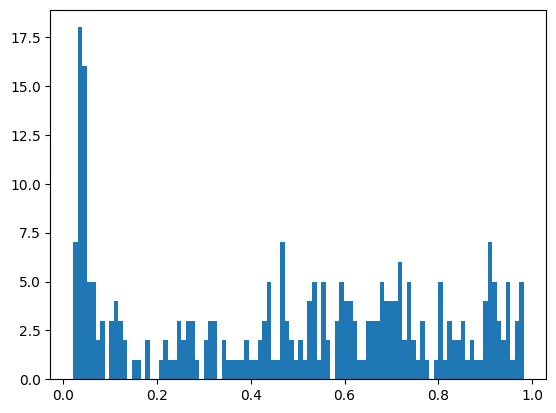

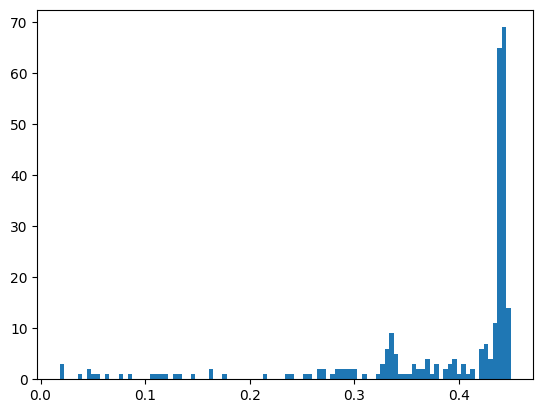

In [21]:
# print(df.head())
import matplotlib.pyplot as plt

plt.hist(df['max_part_activation'], bins=100)
plt.show()

plt.hist(df['max_activation'], bins=100)
plt.show()

In [22]:
# df[df['max_part_Activation'] < 0.1].to_csv(os.path.join(npy_path, 'max_part_activation<0.1.csv'))

In [41]:
# (df[['img_filename', 'img_path']].values).tolist()
# sampled_images = random.sample((df[['img_filename', 'img_path']].values).tolist(), 10)
# sampled_images

# Visualize images with Heatmap and Part locations

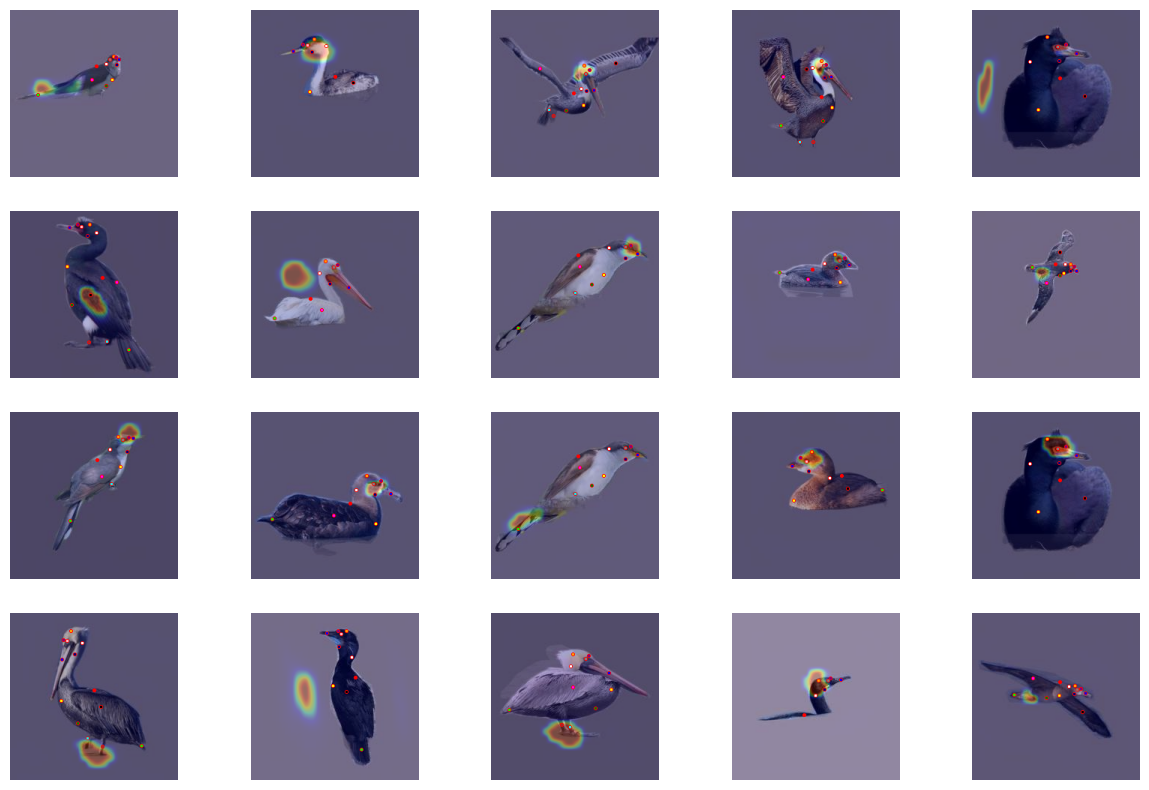

In [23]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

part_color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'pink',
    8: 'brown',
    9: 'black',
    10: 'white',
    11: 'gray',
    12: 'cyan',
    13: 'magenta',
    14: 'lime',
    15: 'navy'
}

# Function to draw parts on an image
def draw_parts(img, part_locs):
    draw = ImageDraw.Draw(img)
    img_width, img_height = img.size
    for part_id, x_norm, y_norm, visible in part_locs:
        if visible:
            x = int(x_norm * img_width)
            y = int(y_norm * img_height)
            draw.ellipse((x - 2, y - 2, x + 2, y + 2), outline="red", fill=part_color_map[part_id])
    return img

def add_heatmap(latent_activation, input_image):
    """
    latent_activation -> np array of shape (H, W)
    input_image -> PIL image of size (H, W)
    """
#     pdb.set_trace()
    
    image_a = latent_activation#.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())
    
    input_image = np.array(input_image)
    image_b = (input_image - input_image.min()) / (input_image.max() - input_image.min())
#     image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a * 255).astype('uint8'))\
                                .resize((input_image.shape[0], input_image.shape[1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
#     pdb.set_trace()
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return result_image

# Function to display images in a Jupyter notebook
def display_images(images):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images, 1):
        plt.subplot(4, 5, i)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
    
# Randomly sample 10 images
# sampled_images = random.sample((df[df['max_part_activation'] < 0.1][['img_filename', 'img_path', 'activation']].values).tolist(), 20)
sampled_images = random.sample((df[['img_filename', 'img_path', 'activation']].values).tolist(), 20)

# Draw parts or heatmap on the images
sampled_images_with_parts = []
for img_filename, img_path, activation in sampled_images:
#     image_path = os.path.join(img_path)
    img_index = img_filename_to_index[img_filename]
    image = Image.open(img_path)
#     pdb.set_trace()
    image = add_heatmap(activation, image)
    image = draw_parts(image, image_part_locs[img_index])
    sampled_images_with_parts.append(image)

# Display the images with parts
display_images(sampled_images_with_parts)



In [ ]:
import numpy as np
from PIL import Image

# 1 back
# 2 beak
# 3 belly
# 4 breast
# 5 crown
# 6 forehead
# 7 left eye
# 8 left leg
# 9 left wing
# 10 nape
# 11 right eye
# 12 right leg
# 13 right wing
# 14 tail
# 15 throat

part_gaussian_std = {
    1: 0.1, # back
    2: 0.05, # beak
    3: 0.1, # belly
    4: 0.05, # breast
    5: 0.05, # crown
    6: 0.05, # forehead
    7: 0.05, # left eye
    8: 0.1, # left leg
    9: 0.1, # left wing
    10: 0.1, # nape
    11: 0.05, # right eye
    12: 0.1, # right leg
    13: 0.1, # right wing
    14: 0.1, # tail
    15: 0.05 # throat
}

# Function to draw parts on an image
def draw_parts(img, part_locs):
    draw = ImageDraw.Draw(img)
    img_width, img_height = img.size
    for part_id, x_norm, y_norm, visible in part_locs:
        if visible:
            x = int(x_norm * img_width)
            y = int(y_norm * img_height)
            draw.ellipse((x - 2, y - 2, x + 2, y + 2), outline="red", fill=part_color_map[part_id])
    return img

def create_gaussian_heatmap(h, w, center, std):
    """Create a Gaussian heatmap."""
    x = np.arange(0, w, 1, float)
    y = np.arange(0, h, 1, float)[:, np.newaxis]
    x0 = center[0]
    y0 = center[1]
    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / std**2)

def overlay_heatmap(input_image, part_locs, part_gaussian_std):
    """Overlay Gaussian heatmap on the image using Image.blend."""
    
    part_locs = {part_id: (x_norm, y_norm) for part_id, x_norm, y_norm, visible in part_locs if visible}
    
    # Convert PIL Image to numpy array
    image_np = np.array(input_image)
    h, w = image_np.shape[:2]
    
    h, w = 26, 26

    # Prepare a blank image for heatmaps
    heatmap_image = Image.new("RGB", (w, h), (0, 0, 0))
    
    heatmap_colored_uint8_list = []

    for part, center in part_locs.items():
        std = part_gaussian_std.get(part, 1) * max(h, w)  # Scale std to image size
        norm_center = (int(center[0] * w), int(center[1] * h))  # Normalize center
        
#         heatmap = create_gaussian_heatmap(h, w, norm_center, std)
#         heatmap = np.clip(heatmap * 255, 0, 255).astype(np.uint8)
#         heatmap_rgb = np.stack((heatmap, heatmap, heatmap), axis=2)  # For RGB
#         heatmap_pil = Image.fromarray(heatmap_rgb, 'RGB')
        
        heatmap = create_gaussian_heatmap(h, w, norm_center, std)
        heatmap_colormap = plt.get_cmap('jet')
        heatmap_colored = heatmap_colormap(heatmap)
        heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
        
        heatmap_colored_uint8_list.append(heatmap_colored_uint8)
        
#         heatmap_pil = Image.fromarray(heatmap_colored_uint8)
    
#         heatmap_image = Image.blend(heatmap_image, heatmap_pil, alpha=0.5)
    
    heatmap_colored_uint8 = heatmap_colored_uint8_list[0]
    for temp_heatmap_colored_uint8 in heatmap_colored_uint8_list[1:]:
        heatmap_colored_uint8 = heatmap_colored_uint8 + temp_heatmap_colored_uint8
        
    heatmap_image = Image.fromarray(heatmap_colored_uint8).resize(image_np.shape[:2], resample=Image.NEAREST)

    # Blend the original image with the heatmap image
    return Image.blend(input_image, heatmap_image, alpha=0.3)


# def overlay_heatmap(input_image, part_locs, part_gaussian_std):
#     """Overlay Gaussian heatmap on the image using Image.blend."""
    
#     part_locs = {part_id: (x_norm, y_norm) for part_id, x_norm, y_norm, visible in part_locs if visible}
    
#     # Convert PIL Image to numpy array
#     image_np = np.array(input_image)
#     h, w = image_np.shape[:2]
    
#     heatmap_image_np = np.zeros_like(image_np).astype(np.uint8)
    
#     # Create and overlay heatmaps
#     for part, center in part_locs.items():
#         std = part_gaussian_std.get(part, 1) * max(h, w)  # Scale std to image size
#         norm_center = (int(center[0] * w), int(center[1] * h))  # Normalize center
#         heatmap = create_gaussian_heatmap(h, w, norm_center, std)
#         heatmap = np.clip(heatmap * 255, 0, 255).astype(np.uint8)
#         heatmap_colormap = plt.get_cmap('jet')
#         heatmap_colored = heatmap_colormap(heatmap)
#         heatmap_image_np = heatmap_image_np + np.array(heatmap_colored)[:, :, :3].astype(np.uint8)
        
#     heatmap_image_np = (heatmap_image_np / len(part_locs)).astype(np.uint8)
#     heatmap_pil = Image.fromarray(heatmap_image_np)
    
#     return Image.blend(input_image, heatmap_pil, alpha=0.5)

#     # Prepare a blank image for heatmaps
#     heatmap_image = Image.new("RGB", (w, h), (0, 0, 0))

#     for part, center in part_locs.items():
#         std = part_gaussian_std.get(part, 1) * max(h, w)  # Scale std to image size
#         norm_center = (int(center[0] * w), int(center[1] * h))  # Normalize center
        
#         heatmap = create_gaussian_heatmap(h, w, norm_center, std)
#         heatmap_colormap = plt.get_cmap('jet')
#         heatmap_colored = heatmap_colormap(heatmap)
        
#         heatmap_image += heatmap_colored
        
#         heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
#         heatmap_pil = Image.fromarray(heatmap_colored_uint8)
    
# #         heatmap_image = Image.blend(heatmap_image, heatmap_pil, alpha=0.5)

#     # Blend the original image with the heatmap image
#     return Image.blend(input_image, heatmap_image, alpha=0.5)

sampled_images = random.sample((df[['img_filename', 'img_path', 'activation']].values).tolist(), 20)

# Draw parts or heatmap on the images
sampled_images_with_parts = []
for img_filename, img_path, activation in sampled_images:
# #     image_path = os.path.join(img_path)
#     img_index = img_filename_to_index[img_filename]
#     image = Image.open(img_path)
# #     pdb.set_trace()
#     image = add_heatmap(activation, image)
#     image = draw_parts(image, image_part_locs[img_index])
    
    img_index = img_filename_to_index[img_filename]
    image = Image.open(img_path)
    image = draw_parts(image, image_part_locs[img_index])
    output_image = overlay_heatmap(image, image_part_locs[img_index], part_gaussian_std)
    sampled_images_with_parts.append(output_image)

# Display the images with parts
display_images(sampled_images_with_parts)

# Example usage
# input_image = Image.open("path_to_image.jpg")
# part_locs = {0: (0.5, 0.5)}  # Example: {part_id: (x_normalized, y_normalized)}
# part_gaussian_std = {0: 0.1}  # Example: {part_id: std_dev}
# output_image = overlay_heatmap(input_image, part_locs, part_gaussian_std)
# output_image.show()


# Calculate Part Consistency

In [40]:
np.set_printoptions(formatter={'float': '{:0.0f}'.format})

def semantic_similarity_based(x):
    global SEMANTIC_SIMILARITY
    num_rows = x.shape[0]
    intraspecies_mask = np.zeros((num_rows, num_rows))
    topk = x['rank'].nunique()
    
    num_protos_for_each_leaf = x.groupby(['leaf_desc'], as_index=False).count()['index'].values.tolist()
    cumulative = 0
    for num_protor_for_one_leaf in num_protos_for_each_leaf:
        ones = np.ones((num_protor_for_one_leaf, num_protor_for_one_leaf))
        np.fill_diagonal(ones, -1)
        intraspecies_mask[cumulative:cumulative+num_protor_for_one_leaf,\
                          cumulative:cumulative+num_protor_for_one_leaf] = ones
        cumulative += num_protor_for_one_leaf
    
#     intraspecies_mask_dummy = np.zeros((num_rows, num_rows))
#     for i in range(0, num_rows, topk):
#         ones = np.ones((topk, topk))
#         np.fill_diagonal(ones, -1)
#         intraspecies_mask_dummy[i:i+topk, i:i+topk] = ones

    part_activation_matrix = np.vstack(x['part_activation_vector'].values)
#     pairwise_part_activation_distance = squareform(pdist(part_activation_matrix, \
#                                                          'mahalanobis', \
#                                                          VI=np.linalg.inv(SEMANTIC_SIMILARITY)))
    pairwise_part_activation_distance = squareform(pdist(part_activation_matrix, \
                                                         'mahalanobis', \
                                                         VI=SEMANTIC_SIMILARITY))
#     pdb.set_trace()
    intraspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 1].mean()
    interspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 0].mean()
    return pd.Series([intraspecies_dist, interspecies_dist], index=['Intraspecies', 'Interspecies'])


# mapping part_id of a left part to it corresponding right part, NOTE: part_ids here are 1-indexed
left_right_parts = {7: 11,
                    8: 12,
                    9: 13}#,
#                     11: 7,
#                     12: 8,
#                     13: 9}

def semantic_less_calculation(x):
    global left_right_parts
    num_rows = x.shape[0]
    intraspecies_mask = np.zeros((num_rows, num_rows))
    topk = x['rank'].nunique()
#     try:
    for i in range(0, num_rows, topk):
        ones = np.ones((topk, topk))
        np.fill_diagonal(ones, -1)
        intraspecies_mask[i:i+topk, i:i+topk] = ones
#     except:
#         pdb.set_trace()
        
#     pdb.set_trace()

    for part_activation_vector in x['part_activation_vector'].values:
        for left, right in left_right_parts.items():
            part_activation_vector[left-1] = max(part_activation_vector[left-1], \
                                                  part_activation_vector[right-1])
            part_activation_vector[right-1] = max(part_activation_vector[left-1], \
                                                  part_activation_vector[right-1])

    part_activation_matrix = np.vstack(x['part_activation_vector'].values)
    pairwise_part_activation_distance = squareform(pdist(part_activation_matrix)) # euclidean
    intraspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 1].mean()
    interspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 0].mean()
    return pd.Series([intraspecies_dist, interspecies_dist], index=['Intraspecies', 'Interspecies'])


proto_part_consistency_metrics = df[df['max_part_activation'] > 0.2].groupby(['node_name', 'proto_num'], as_index=False).apply(semantic_similarity_based)
# proto_part_consistency_metrics = df.groupby(['node_name', 'proto_num'], as_index=False).apply(semantic_less_calculation)

/tmp/ipykernel_3649125/1569579321.py:33: RuntimeWarning: Mean of empty slice.
  interspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 0].mean()
/home/harishbabu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3649125/1569579321.py:33: RuntimeWarning: Mean of empty slice.
  interspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 0].mean()
/home/harishbabu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3649125/1569579321.py:33: RuntimeWarning: Mean of empty slice.
  interspecies_dist = pairwise_part_activation_distance[intraspecies_mask == 0].mean()
/home/harishbabu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dt

# Aggregated Part Consistency

In [41]:
# smt
proto_part_consistency_metrics.head(100)

# df[['node_name', 'proto_num']].nunique()

# unique_combinations_count = pd.Series(list(zip(df['node_name'], df['proto_num']))).nunique()
# unique_combinations_count
# df.groupby(['node_name', 'proto_num'])[0]

print('Interspecies', proto_part_consistency_metrics['Interspecies'].mean())
print('Intraspecies', proto_part_consistency_metrics['Intraspecies'].mean())

with open(os.path.join(npy_path, "inter-intra-species-distance.txt"), "w") as file:
    file.write('Interspecies: ' + str(proto_part_consistency_metrics['Interspecies'].mean()) + "\n")
    file.write('Intraspecies: ' + str(proto_part_consistency_metrics['Intraspecies'].mean()) + "\n")    

Interspecies 0.5225130757468418
Intraspecies 0.512740363772654


In [61]:
# import os
# for root, dirs, files in os.walk(npy_path, topdown=False):
#     for name in files:
#         print(os.path.join(root, name))
#     for name in dirs:
#         print(os.path.join(root, name))
        
import pandas as pd
print(pd.__version__)

df = pd.DataFrame({'Column1': [np.nan, 2, 3], 'Column2': ['A', 'B', 'C']})
print(df)
print(df['Column1'].mean())

df['']

In [ ]:
# Process each subfolder and .npy file
subfolder_vectors = {}
for subfolder in os.listdir(base_folder):
    subfolder_path = os.path.join(base_folder, subfolder)
    if os.path.isdir(subfolder_path):
        vectors = []
        for file in os.listdir(subfolder_path):
            if file.endswith('.npy'):
                data = np.load(os.path.join(subfolder_path, file), allow_pickle=True).item()
                activation_array = data['activation']
                vector = []
                for x, y in part_locations[data['proto_num']]:  # Assuming proto_num corresponds to image_index
                    # Extract the activation value for each part
                    x_idx = min(int(x * 224), 223)
                    y_idx = min(int(y * 224), 223)
                    vector.append(activation_array[x_idx, y_idx])
                vectors.append(vector)
        subfolder_vectors[subfolder] = vectors

# subfolder_vectors now contains the vectors keyed by subfolder names
